In [1]:
import os
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# for the persistence diagrams
import gudhi as gd
import gudhi.representations

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
# directory = r"trial_matrices"
# betti_df = pd.DataFrame(columns=["\u03B20", "\u03B21", "\u03B22"])
# plot_directory = r"pers_hom"

# for name in sorted(os.listdir(directory)):
#     file_path = os.path.join(directory, name)
    
#     if os.path.isfile(file_path) and name.endswith('.pickl'):
#         try:
#             with open(file_path, 'rb') as f:
#                 print(f"Distance matrix of {name}")
#                 data = pickle.load(f)
#                 dist_matrix = data.get('distance matrix')
#                 if dist_matrix is None:
#                     print(f"Distance matrix not found in {name}")
#         except (pickle.UnpicklingError, EOFError, KeyError) as e:
#             print(f"Error loading {name}: {e}")
#             continue

In [3]:
filepath = r'110 2013-09-27 00_00_00.pickl'
with open(filepath, 'rb') as f:
    print(f"Distance matrix of {filepath}")
    data = pickle.load(f)
    dist_matrix = data.get('distance matrix')
dist_matrix 
data

Distance matrix of 110 2013-09-27 00_00_00.pickl


{'PSE log returns': array([[-0.00288488, -0.00548838,  0.01037081, ..., -0.08701138,
          0.00452597,         nan],
        [ 0.02221135, -0.00551772,  0.00917367, ..., -0.00635823,
          0.00437456,         nan],
        [ 0.11327493, -0.01435705,  0.02094752, ..., -0.01768347,
          0.012235  ,         nan],
        ...,
        [ 0.02471973,  0.01440943, -0.00658412, ..., -0.06724397,
         -0.15630727,         nan],
        [ 0.00790474,  0.00523046, -0.00167632, ..., -0.01115355,
         -0.05902225,         nan],
        [ 0.00774352,  0.00543935, -0.00165836, ..., -0.00620261,
         -0.06324379,         nan]]),
 'covariance matrix': array([[ 4.79907706e-04, -2.38267578e-05,  9.24536831e-06, ...,
         -7.97450719e-06, -3.01890123e-05, -7.53104055e-05],
        [-2.38267578e-05,  3.07098464e-04,  1.02597658e-04, ...,
          3.55284143e-06, -3.56134019e-05,  2.14620287e-05],
        [ 9.24536831e-06,  1.02597658e-04,  1.30863663e-03, ...,
          1.1515

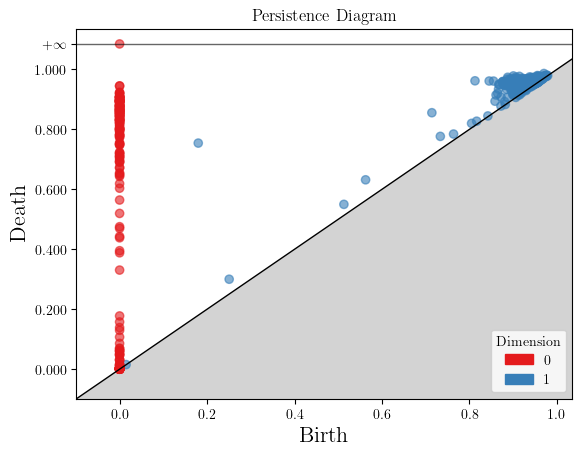

In [5]:
# Create Rips complex
max_dist = np.max(dist_matrix)
rips_complex = gd.RipsComplex(distance_matrix=dist_matrix, max_edge_length=max_dist)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()

# Plot persistence diagram
gd.plot_persistence_diagram(diag)
plt.title("Persistence Diagram")
plt.show()

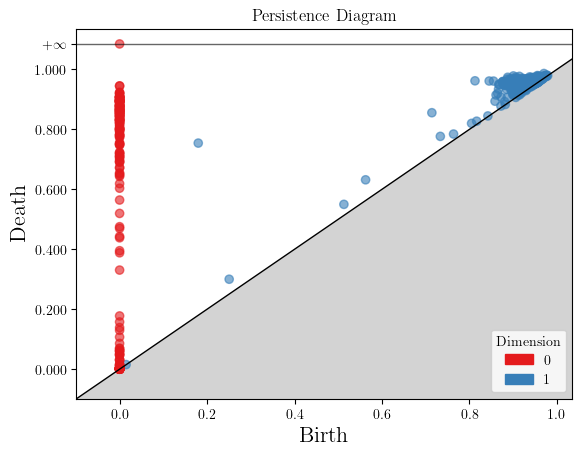

Persistent holes found!


In [12]:
# Create Rips complex
max_dist = np.max(dist_matrix)
rips_complex = gd.RipsComplex(distance_matrix=dist_matrix, max_edge_length=max_dist)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence()

# Plot persistence diagram
gd.plot_persistence_diagram(diag)
plt.title("Persistence Diagram")
plt.show()

# Extract persistence diagram
persistence_diagram = simplex_tree.persistence_intervals_in_dimension(1)
if len(persistence_diagram) > 0:
    print("Persistent holes found!")

In [6]:
# rips_complex = gd.RipsComplex(distance_matrix=dist_matrix, max_edge_length=1.0)
# simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
# simplex_tree.persistence()

# pers_diag = simplex_tree.persistence_intervals_in_dimension(0)  # H0
# pers_diag_1 = simplex_tree.persistence_intervals_in_dimension(1)  # H1
# pers_diag_2 = simplex_tree.persistence_intervals_in_dimension(2)  # H2

# pers_diag = simplex_tree.persistence_intervals_in_dimension(0)
# gd.plot_persistence_diagram(simplex_tree.persistence());